In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-price-of-onion-2020/Onion Prices 2020.csv


In [2]:
df = pd.read_csv("/kaggle/input/market-price-of-onion-2020/Onion Prices 2020.csv")

In [3]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [4]:
df.shape

(107295, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  object 
 1   district      107295 non-null  object 
 2   market        107295 non-null  object 
 3   commodity     107295 non-null  object 
 4   variety       107295 non-null  object 
 5   arrival_date  107295 non-null  object 
 6   min_price     107295 non-null  int64  
 7   max_price     107295 non-null  int64  
 8   modal_price   107295 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.4+ MB


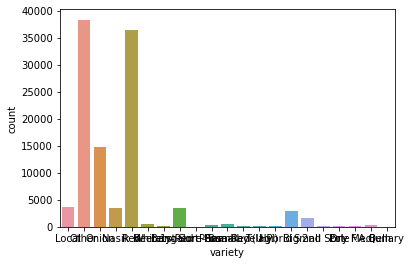

In [6]:
sns.countplot(x='variety',data=df)

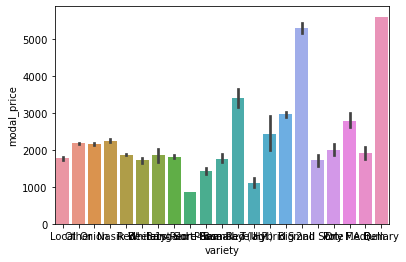

In [7]:
sns.barplot(df['variety'],df['modal_price'])

# **Dummy variable**

In [8]:
df=pd.get_dummies(df)

In [9]:
df.head()

,min_price,max_price,modal_price,state_Andhra Pradesh,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,...,arrival_date_30/04/2020,arrival_date_30/05/2020,arrival_date_30/06/2020,arrival_date_30/07/2020,arrival_date_30/08/2020,arrival_date_31/01/2020,arrival_date_31/03/2020,arrival_date_31/05/2020,arrival_date_31/07/2020,arrival_date_31/08/2020
0,1350,4390,3100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1390,4400,3200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1460,5150,4310.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,5200,4200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1320,4050,3300.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **x-y split**

In [10]:
x =df.loc[:,df.columns!='modal_price']

In [11]:
x.shape

(107295, 1526)

In [12]:
y= df['modal_price']

In [13]:
y.shape

(107295,)

# **train_test_split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.head()

,min_price,max_price,state_Andhra Pradesh,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Jharkhand,...,arrival_date_30/04/2020,arrival_date_30/05/2020,arrival_date_30/06/2020,arrival_date_30/07/2020,arrival_date_30/08/2020,arrival_date_31/01/2020,arrival_date_31/03/2020,arrival_date_31/05/2020,arrival_date_31/07/2020,arrival_date_31/08/2020
51785,800,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63137,1200,1350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54316,1650,2050,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89591,850,950,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47324,1000,1200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_train.shape

(85836, 1526)

In [18]:
y_train.head()

51785    1000.0
63137    1250.0
54316    1760.0
89591     900.0
47324    1200.0
Name: modal_price, dtype: float64

In [19]:
y_train.shape

(85836,)

In [20]:
x_test.shape

(21459, 1526)

In [21]:
y_test.shape

(21459,)

# **Creating Model**

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression().fit(x_train,y_train)

In [24]:
model.score(x_test,y_test)*100

99.22907912699354

In [25]:
model.predict(x_test)

array([ 909.9731052 , 1844.04851405, 1300.02394832, ..., 1076.85254649,
       2339.58816277, 2725.96690689])

In [26]:
y_pred=model.predict(x_test)